In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawData1 = pd.read_csv("C:/Users/Richa/Desktop/rawData1.csv")

## Prediction of Salary (Regression Analysis)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
data=rawData1.copy()
data.drop("sl_no", axis=1, inplace=True)

In [5]:
data.drop("Placed?", axis=1, inplace=True)
data.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,salary,Male?,Experience?,HSCentralBoard?,SpecialisationInHR?,SSCentralBoard?
0,67.00,91.00,1,58.00,2,55.0,58.80,270000.0,1.0,0.0,0.0,1.0,0.0
1,79.33,78.33,2,77.48,2,86.5,66.28,200000.0,1.0,1.0,0.0,0.0,1.0
2,65.00,68.00,0,64.00,0,75.0,57.80,250000.0,1.0,0.0,1.0,0.0,1.0
3,56.00,52.00,2,52.00,2,66.0,59.43,0.0,1.0,0.0,1.0,1.0,1.0
4,85.80,73.60,1,73.30,0,96.8,55.50,425000.0,1.0,0.0,1.0,0.0,1.0


In [6]:
corr=data.corr()
corr

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,salary,Male?,Experience?,HSCentralBoard?,SpecialisationInHR?,SSCentralBoard?
ssc_p,1.000000,0.511472,0.236364,0.538404,0.205896,0.261993,0.388478,0.538090,-0.068969,0.175675,-0.066996,-0.172536,-0.116194
hsc_p,0.511472,1.000000,-0.164091,0.434206,-0.086450,0.245113,0.354823,0.452569,-0.021334,0.141025,0.019548,-0.241630,0.137013
hsc_s,0.236364,-0.164091,1.000000,0.137276,0.596300,0.075643,0.039345,0.058970,0.071827,0.007856,-0.152227,0.172107,-0.050919
degree_p,0.538404,0.434206,0.137276,1.000000,0.079317,0.224470,0.402364,0.408371,-0.173217,0.122648,-0.067229,-0.218286,-0.038070
degree_t,0.205896,-0.086450,0.596300,0.079317,1.000000,0.011509,0.116666,0.053155,0.061345,0.105816,-0.057960,0.084361,-0.100863
etest_p,0.261993,0.245113,0.075643,0.224470,0.011509,1.000000,0.218055,0.186988,0.084294,0.056735,-0.039108,-0.236315,0.018991
mba_p,0.388478,0.354823,0.039345,0.402364,0.116666,0.218055,1.000000,0.139823,-0.300531,0.168811,-0.090201,-0.105728,-0.083120
salary,0.538090,0.452569,0.058970,0.408371,0.053155,0.186988,0.139823,1.000000,0.143110,0.298285,-0.011544,-0.275766,-0.034594
Male?,-0.068969,-0.021334,0.071827,-0.173217,0.061345,0.084294,-0.300531,0.143110,1.000000,0.085153,-0.065945,-0.106160,-0.019429
Experience?,0.175675,0.141025,0.007856,0.122648,0.105816,0.056735,0.168811,0.298285,0.085153,1.000000,-0.038357,-0.191174,0.040744


In [7]:
x=data.drop("salary",axis=1)
y=data['salary']

In [8]:
column_names = x.columns.values

In [9]:
#Scalizing between 0-1 (Normalization)
x_scaled = MinMaxScaler().fit_transform(x)

#### 1. Determining Least Significant Variable by R2 Score

In [10]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

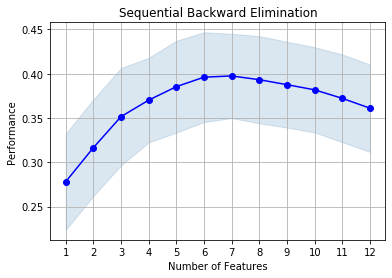

In [12]:
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(x_scaled, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()

###### Lets see the top 6 most significant features

In [13]:
top_n = 6
sfs.get_metric_dict()[top_n]

{'feature_idx': (0, 1, 3, 6, 7, 8),
 'cv_scores': array([0.54284855, 0.48214837, 0.41464369, 0.40877895, 0.45748114,
        0.07530325, 0.29372688, 0.22296426, 0.43636546, 0.62710697]),
 'avg_score': 0.3961367498649258,
 'feature_names': ('0', '1', '3', '6', '7', '8'),
 'ci_bound': 0.11302032441301839,
 'std_dev': 0.152172281785781,
 'std_err': 0.05072409392859366}

In [14]:
#Top N Features
top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

Most Significant 6 Features:
ssc_p
hsc_p
degree_p
mba_p
Male?
Experience?


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(x_scaled, y)
y_pred = lin_reg.predict(x_scaled)
print(f"R2 Score: {r2_score(y, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

R2 Score: 0.43593530030022076
Mean Absolute Error: 87020.88016177951


#### 2. Determining Least Significant Variable by P-Value

In [16]:
#Converting to DF for as  column names gives readibility
x_scaled = pd.DataFrame(x_scaled, columns=column_names)
y = y.values

# We must add a constants 1s for intercept before doing Linear Regression with statsmodel
x_scaled = sm.add_constant(x_scaled)
x_scaled

,const,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,Male?,Experience?,HSCentralBoard?,SpecialisationInHR?,SSCentralBoard?
0,1.0,0.538240,0.889621,0.5,0.195122,1.0,0.104167,0.284483,1.0,0.0,0.0,1.0,0.0
1,1.0,0.792414,0.680890,1.0,0.670244,1.0,0.760417,0.564843,1.0,1.0,0.0,0.0,1.0
2,1.0,0.497011,0.510708,0.0,0.341463,0.0,0.520833,0.247001,1.0,0.0,1.0,0.0,1.0
3,1.0,0.311482,0.247117,1.0,0.048780,1.0,0.333333,0.308096,1.0,0.0,1.0,1.0,1.0
4,1.0,0.925788,0.602965,0.5,0.568293,0.0,0.975000,0.160795,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,0.818594,0.741351,0.5,0.673171,0.0,0.854167,0.872564,1.0,0.0,0.0,0.0,0.0
211,1.0,0.352711,0.378913,1.0,0.536585,1.0,0.500000,0.090330,1.0,0.0,0.0,0.0,0.0
212,1.0,0.538240,0.494234,0.5,0.560976,0.0,0.187500,0.693778,1.0,1.0,0.0,0.0,0.0
213,1.0,0.682540,0.477759,0.5,0.195122,0.0,0.416667,0.338081,0.0,0.0,0.0,1.0,0.0


In [17]:
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     13.01
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.30e-19
Time:                        16:46:36   Log-Likelihood:                -2812.2
No. Observations:                 215   AIC:                             5650.
Df Residuals:                     202   BIC:                             5694.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.952e+04   4.16e+04     -1.912      0.057   -1.62e+05    2498.679
ssc_p                2.444e+05   5.18e+04      4.715      0.000    1.42e+05    3.47e+05
hsc_p                1.855e+05   6.21e+04      2.988      0.003    6.31e+04    3.08e+05
hsc_s                1.535e+04   3.91e+04      0.392      0.695   -6.18e+04    9.25e+04
degree_p             1.402e+05   5.84e+04      2.403      0.017    2.52e+04    2.55e+05
degree_t            -1.373e+04   2.36e+04     -0.581      0.562   -6.03e+04    3.29e+04
etest_p             -3799.6837   3.22e+04     -0.118      0.906   -6.73e+04    5.97e+04
mba_p               -9.463e+04   4.57e+04     -2.071      0.040   -1.85e+05   -4550.409
Male?                4.469e+04   1.89e+04      2.366      0.019    7447.531    8.19e+04
Experience?          6.162e+04   1.82e+04      3.389      0.001    2.58e+04    9.75e+04
HSCentralBoard?      2.172e+04   2.19e+04      0.990      0.323   -2.15e+04     6.5e+04
SpecialisationInHR? -2.799e+04   1.82e+04     -1.539      0.125   -6.38e+04    7863.150
SSCentralBoard?     -2.243e+04   2.21e+04     -1.015      0.311    -6.6e+04    2.11e+04
==============================================================================
Omnibus:                       88.141   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.744
Skew:                           1.523   Prob(JB):                     8.03e-99
Kurtosis:                       9.415   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Now, we will identify the column with maximum p-values and drop them.

In [18]:
x_scaled = x_scaled.drop('etest_p', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           3.37e-20
Time:                        16:46:36   Log-Likelihood:                -2812.2
No. Observations:                 215   AIC:                             5648.
Df Residuals:                     203   BIC:                             5689.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.007e+04   4.12e+04     -1.942      0.054   -1.61e+05    1230.617
ssc_p                2.438e+05   5.15e+04      4.735      0.000    1.42e+05    3.45e+05
hsc_p                1.851e+05   6.18e+04      2.993      0.003    6.32e+04    3.07e+05
hsc_s                1.493e+04   3.88e+04      0.384      0.701   -6.17e+04    9.15e+04
degree_p               1.4e+05   5.82e+04      2.406      0.017    2.53e+04    2.55e+05
degree_t            -1.354e+04   2.35e+04     -0.576      0.565   -5.99e+04    3.28e+04
mba_p               -9.542e+04   4.51e+04     -2.117      0.036   -1.84e+05   -6528.094
Male?                 4.44e+04   1.87e+04      2.376      0.018    7560.745    8.12e+04
Experience?          6.173e+04   1.81e+04      3.409      0.001     2.6e+04    9.74e+04
HSCentralBoard?      2.181e+04   2.19e+04      0.997      0.320   -2.13e+04    6.49e+04
SpecialisationInHR?  -2.76e+04   1.78e+04     -1.547      0.123   -6.28e+04    7571.124
SSCentralBoard?     -2.259e+04    2.2e+04     -1.027      0.306    -6.6e+04    2.08e+04
==============================================================================
Omnibus:                       88.079   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.840
Skew:                           1.523   Prob(JB):                     2.08e-98
Kurtosis:                       9.398   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_scaled = x_scaled.drop('hsc_s', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     15.74
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           8.81e-21
Time:                        16:46:36   Log-Likelihood:                -2812.3
No. Observations:                 215   AIC:                             5647.
Df Residuals:                     204   BIC:                             5684.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.266e+04   3.64e+04     -1.998      0.047   -1.44e+05    -951.745
ssc_p                 2.49e+05   4.96e+04      5.017      0.000    1.51e+05    3.47e+05
hsc_p                1.782e+05    5.9e+04      3.017      0.003    6.18e+04    2.95e+05
degree_p             1.431e+05   5.75e+04      2.490      0.014    2.98e+04    2.56e+05
degree_t            -8563.9745   1.96e+04     -0.437      0.663   -4.72e+04    3.01e+04
mba_p               -9.605e+04    4.5e+04     -2.136      0.034   -1.85e+05   -7404.891
Male?                4.506e+04   1.86e+04      2.427      0.016    8458.470    8.17e+04
Experience?          6.116e+04    1.8e+04      3.395      0.001    2.56e+04    9.67e+04
HSCentralBoard?      1.994e+04   2.13e+04      0.937      0.350    -2.2e+04    6.19e+04
SpecialisationInHR?  -2.66e+04   1.76e+04     -1.510      0.132   -6.13e+04    8122.970
SSCentralBoard?     -2.087e+04   2.15e+04     -0.971      0.333   -6.32e+04    2.15e+04
==============================================================================
Omnibus:                       88.434   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.621
Skew:                           1.528   Prob(JB):                     1.91e-99
Kurtosis:                       9.435   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x_scaled = x_scaled.drop('degree_t', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.53
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           2.22e-21
Time:                        16:46:36   Log-Likelihood:                -2812.4
No. Observations:                 215   AIC:                             5645.
Df Residuals:                     205   BIC:                             5679.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.299e+04   3.63e+04     -2.011      0.046   -1.45e+05   -1441.065
ssc_p                 2.44e+05   4.82e+04      5.062      0.000    1.49e+05    3.39e+05
hsc_p                1.838e+05   5.75e+04      3.197      0.002    7.04e+04    2.97e+05
degree_p             1.426e+05   5.74e+04      2.486      0.014    2.95e+04    2.56e+05
mba_p               -9.815e+04   4.46e+04     -2.200      0.029   -1.86e+05   -1.02e+04
Male?                4.409e+04   1.84e+04      2.397      0.017    7822.612    8.04e+04
Experience?          6.049e+04   1.79e+04      3.377      0.001    2.52e+04    9.58e+04
HSCentralBoard?      1.985e+04   2.12e+04      0.935      0.351    -2.2e+04    6.17e+04
SpecialisationInHR? -2.751e+04   1.74e+04     -1.577      0.116   -6.19e+04    6893.524
SSCentralBoard?     -2.061e+04   2.14e+04     -0.961      0.338   -6.29e+04    2.17e+04
==============================================================================
Omnibus:                       87.206   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.952
Skew:                           1.501   Prob(JB):                     1.97e-98
Kurtosis:                       9.420   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x_scaled = x_scaled.drop('HSCentralBoard?', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     19.63
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           7.32e-22
Time:                        16:46:36   Log-Likelihood:                -2812.9
No. Observations:                 215   AIC:                             5644.
Df Residuals:                     206   BIC:                             5674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.764e+04   3.58e+04     -1.888      0.060   -1.38e+05    2990.835
ssc_p                2.478e+05    4.8e+04      5.163      0.000    1.53e+05    3.42e+05
hsc_p                1.793e+05   5.73e+04      3.131      0.002    6.64e+04    2.92e+05
degree_p             1.393e+05   5.72e+04      2.433      0.016    2.64e+04    2.52e+05
mba_p               -9.986e+04   4.46e+04     -2.241      0.026   -1.88e+05    -1.2e+04
Male?                4.258e+04   1.83e+04      2.324      0.021    6465.418    7.87e+04
Experience?          5.923e+04   1.79e+04      3.317      0.001     2.4e+04    9.44e+04
SpecialisationInHR?   -2.9e+04   1.74e+04     -1.670      0.097   -6.33e+04    5244.932
SSCentralBoard?     -8427.3640    1.7e+04     -0.495      0.621    -4.2e+04    2.51e+04
==============================================================================
Omnibus:                       88.871   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.890
Skew:                           1.518   Prob(JB):                    1.02e-104
Kurtosis:                       9.652   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x_scaled = x_scaled.drop('SSCentralBoard?', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     22.48
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.66e-22
Time:                        16:46:36   Log-Likelihood:                -2813.0
No. Observations:                 215   AIC:                             5642.
Df Residuals:                     207   BIC:                             5669.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -7.19e+04   3.47e+04     -2.072      0.040    -1.4e+05   -3475.995
ssc_p                2.521e+05   4.71e+04      5.350      0.000    1.59e+05    3.45e+05
hsc_p                1.722e+05   5.53e+04      3.112      0.002    6.31e+04    2.81e+05
degree_p             1.393e+05   5.71e+04      2.438      0.016    2.66e+04    2.52e+05
mba_p                -9.74e+04   4.42e+04     -2.204      0.029   -1.85e+05   -1.03e+04
Male?                4.316e+04   1.82e+04      2.365      0.019    7178.060    7.91e+04
Experience?          5.852e+04   1.78e+04      3.294      0.001    2.35e+04    9.35e+04
SpecialisationInHR? -2.969e+04   1.73e+04     -1.718      0.087   -6.38e+04    4387.631
==============================================================================
Omnibus:                       87.499   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.841
Skew:                           1.501   Prob(JB):                    3.81e-100
Kurtosis:                       9.488   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x_scaled = x_scaled.drop('SpecialisationInHR?', axis=1)
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     25.50
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.30e-22
Time:                        16:46:36   Log-Likelihood:                -2814.5
No. Observations:                 215   AIC:                             5643.
Df Residuals:                     208   BIC:                             5667.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.003e+05   3.07e+04     -3.270      0.001   -1.61e+05   -3.98e+04
ssc_p        2.513e+05   4.73e+04      5.308      0.000    1.58e+05    3.45e+05
hsc_p        1.854e+05    5.5e+04      3.369      0.001    7.69e+04    2.94e+05
degree_p     1.523e+05   5.69e+04      2.677      0.008    4.01e+04    2.64e+05
mba_p       -9.714e+04   4.44e+04     -2.187      0.030   -1.85e+05   -9588.688
Male?        4.702e+04   1.82e+04      2.584      0.010    1.12e+04    8.29e+04
Experience?  6.286e+04   1.77e+04      3.558      0.000     2.8e+04    9.77e+04
==============================================================================
Omnibus:                       89.862   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.261
Skew:                           1.533   Prob(JB):                    3.48e-107
Kurtosis:                       9.732   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Thus, Top 6 Features affecting salary we identified are:

        Male?
        Experiennce
        ssc_p 
        hsc_p
        degree_p
        mba_p 

## A. Multicollinearity

In [24]:
data1=data[['Experience?','ssc_p','hsc_p','degree_p','Male?','mba_p','salary']]
data1.head()

,Experience?,ssc_p,hsc_p,degree_p,Male?,mba_p,salary
0,0.0,67.00,91.00,58.00,1.0,58.80,270000.0
1,1.0,79.33,78.33,77.48,1.0,66.28,200000.0
2,0.0,65.00,68.00,64.00,1.0,57.80,250000.0
3,0.0,56.00,52.00,52.00,1.0,59.43,0.0
4,0.0,85.80,73.60,73.30,1.0,55.50,425000.0


In [25]:
corr=data1.corr()
corr

,Experience?,ssc_p,hsc_p,degree_p,Male?,mba_p,salary
Experience?,1.000000,0.175675,0.141025,0.122648,0.085153,0.168811,0.298285
ssc_p,0.175675,1.000000,0.511472,0.538404,-0.068969,0.388478,0.538090
hsc_p,0.141025,0.511472,1.000000,0.434206,-0.021334,0.354823,0.452569
degree_p,0.122648,0.538404,0.434206,1.000000,-0.173217,0.402364,0.408371
Male?,0.085153,-0.068969,-0.021334,-0.173217,1.000000,-0.300531,0.143110
mba_p,0.168811,0.388478,0.354823,0.402364,-0.300531,1.000000,0.139823
salary,0.298285,0.538090,0.452569,0.408371,0.143110,0.139823,1.000000


In [26]:
data2=data[['Experience?','ssc_p','hsc_p','degree_p','salary']]
data2.head()

,Experience?,ssc_p,hsc_p,degree_p,salary
0,0.0,67.00,91.00,58.00,270000.0
1,1.0,79.33,78.33,77.48,200000.0
2,0.0,65.00,68.00,64.00,250000.0
3,0.0,56.00,52.00,52.00,0.0
4,0.0,85.80,73.60,73.30,425000.0


In [27]:
corr=data2.corr()
corr

,Experience?,ssc_p,hsc_p,degree_p,salary
Experience?,1.000000,0.175675,0.141025,0.122648,0.298285
ssc_p,0.175675,1.000000,0.511472,0.538404,0.538090
hsc_p,0.141025,0.511472,1.000000,0.434206,0.452569
degree_p,0.122648,0.538404,0.434206,1.000000,0.408371
salary,0.298285,0.538090,0.452569,0.408371,1.000000


#### Variance Inflation Factor (VIF)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
from sklearn.model_selection import train_test_split
x2=data2.drop(['salary'],axis=1)
y2=data2['salary']

In [30]:
X = add_constant(x2)
print ("VIF:")
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF:


const          89.690656
Experience?     1.036096
ssc_p           1.643131
hsc_p           1.426960
degree_p        1.480042
dtype: float64

## B. Normality

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x2,y2,test_size=0.15)

In [32]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()

In [33]:
model_2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred= model_2.predict(x_test)

In [35]:
model_2.score(x_train,y_train)

0.3786740366469554

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.33078062661097907

In [37]:
print('y_intercept:', model_2.intercept_)

y_intercept: -542600.0813516462


In [38]:
print(dict(zip(x_train, model_2.coef_)))

{'Experience?': 54458.4343921803, 'ssc_p': 4005.4427507317346, 'hsc_p': 3156.085459062547, 'degree_p': 3647.9873953998394}


In [39]:
x2_scaled = MinMaxScaler().fit_transform(x2)
column_names = x2.columns.values
x2_scaled = pd.DataFrame(x2_scaled, columns=column_names)
y2 = y2.values
x2_scaled = sm.add_constant(x2_scaled)
model2 = sm.OLS(y2, x2_scaled)

In [40]:
data2_result=pd.DataFrame()

In [41]:
fitted = model2.fit()
data2_result['pvalues']=fitted.pvalues[1:]

In [42]:
data2_result['Features']=data2.columns[:-1]

In [43]:
data2_result.set_index('Features',inplace=True)

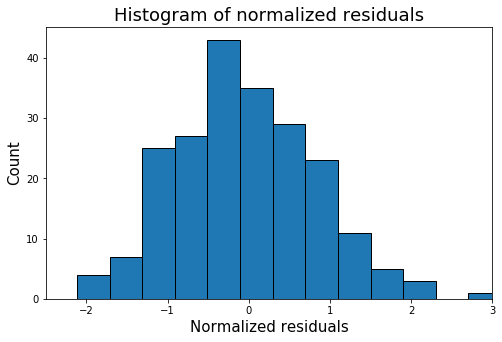

In [44]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.xlim(-2.5, 3)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

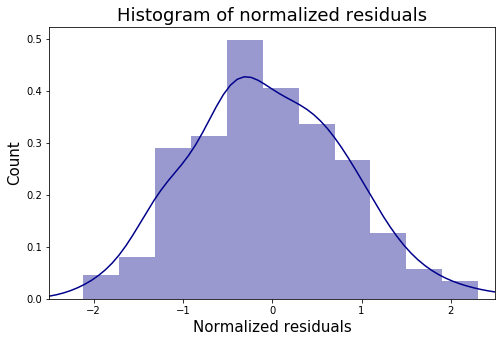

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(fitted.resid_pearson, hist=True, bins=int(20), color = 'darkblue')
plt.xlim(-2.5, 2.5)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [46]:
import scipy

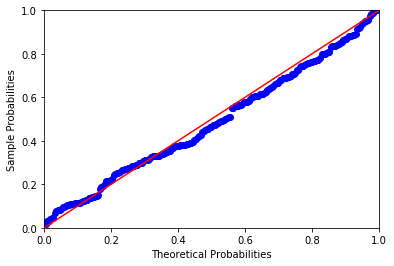

In [47]:
sm.ProbPlot(fitted.resid_pearson, scipy.stats.norm, loc=0, scale=1).ppplot(line='45')
plt.show()

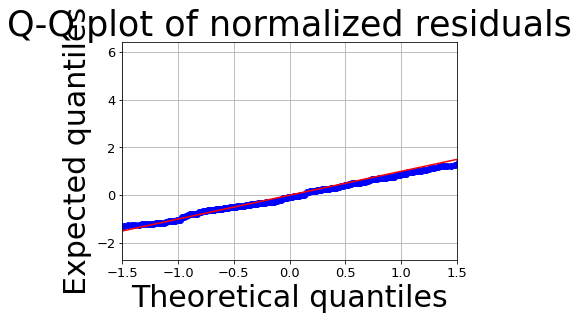

In [48]:
from statsmodels.graphics.gofplots import qqplot
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xlim(-1.5, 1.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=30)
plt.ylabel("Expected quantiles",fontsize=30)
plt.title("Q-Q plot of normalized residuals",fontsize=35)
plt.grid(True)
plt.show()

## C. Homoscedasticity

In [49]:
from scipy import stats

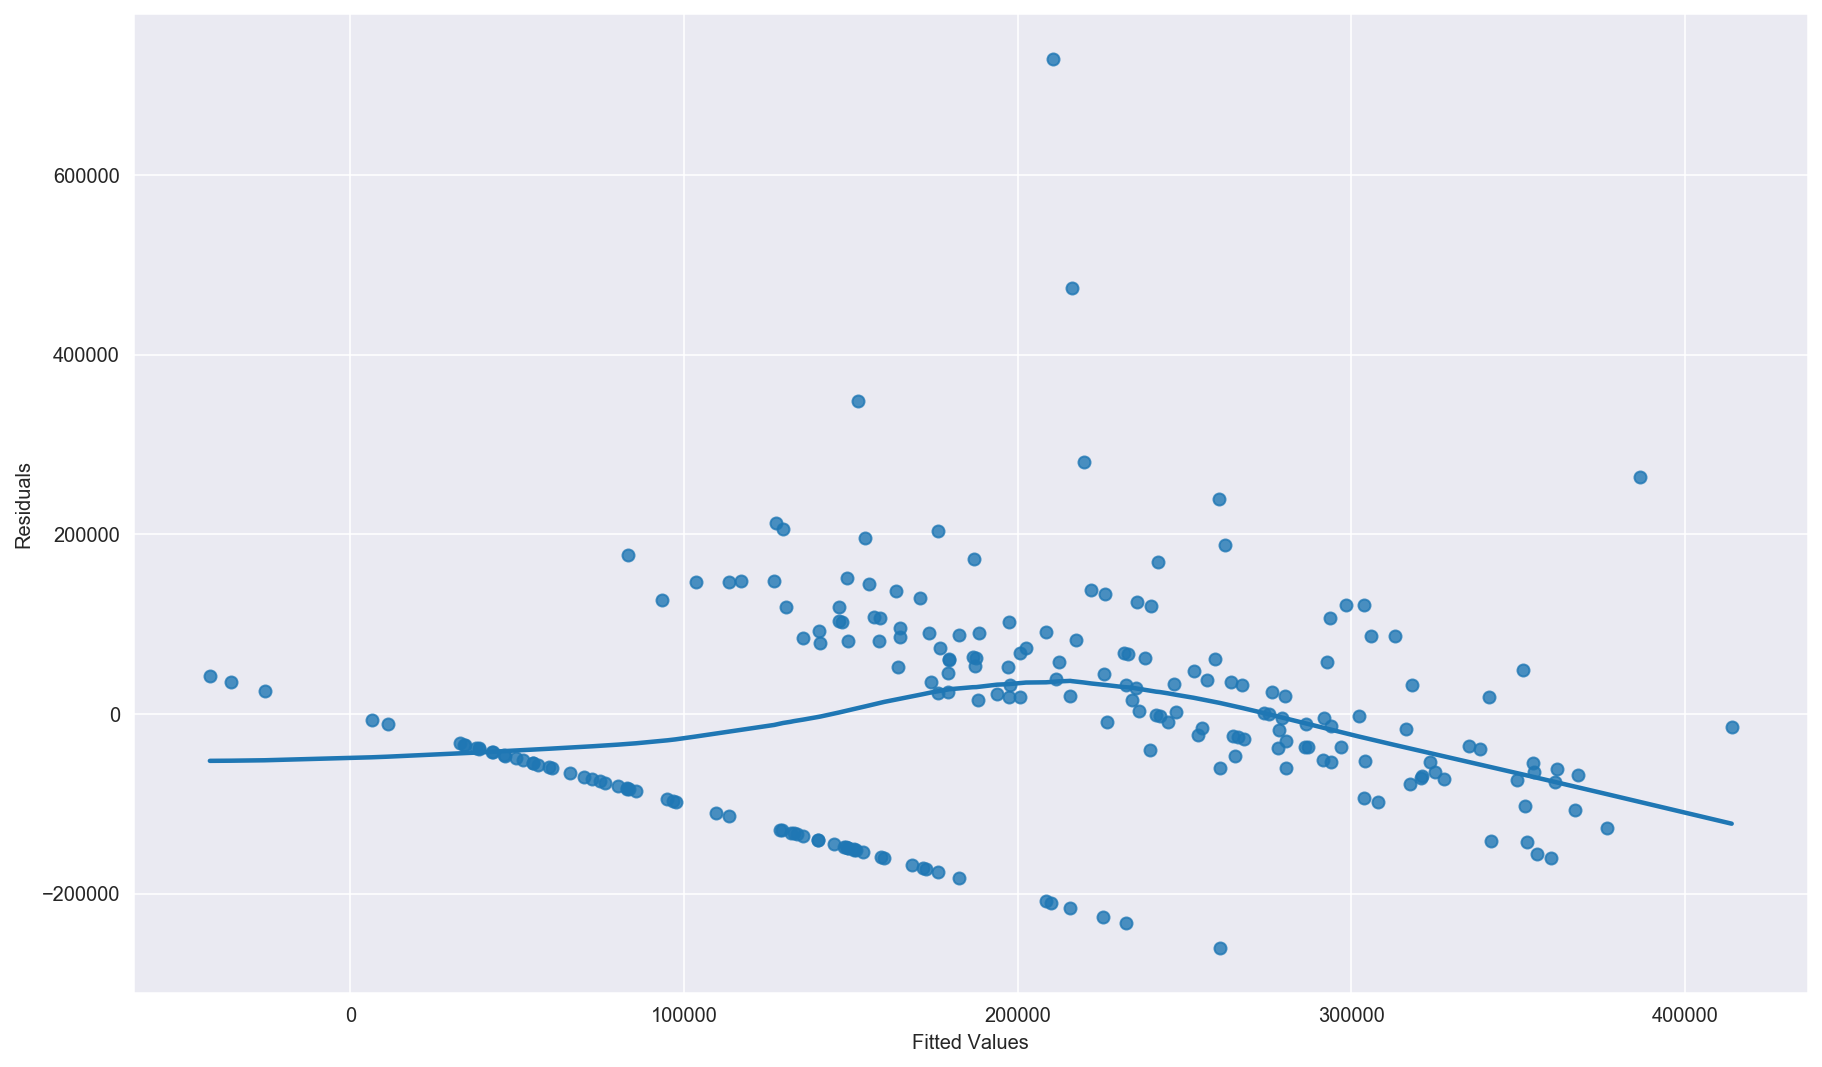

In [50]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
fitted_vals = fitted.predict()
resids = fitted.resid
resids_standardized = fitted.get_influence().resid_studentized_internal
x, y = pd.Series(fitted_vals, name="Fitted Values"), pd.Series(resids, name="Residuals")
sns.regplot(x, y, lowess=True)

## D. Linearity

Text(0.5, 0, 'ssc_p')

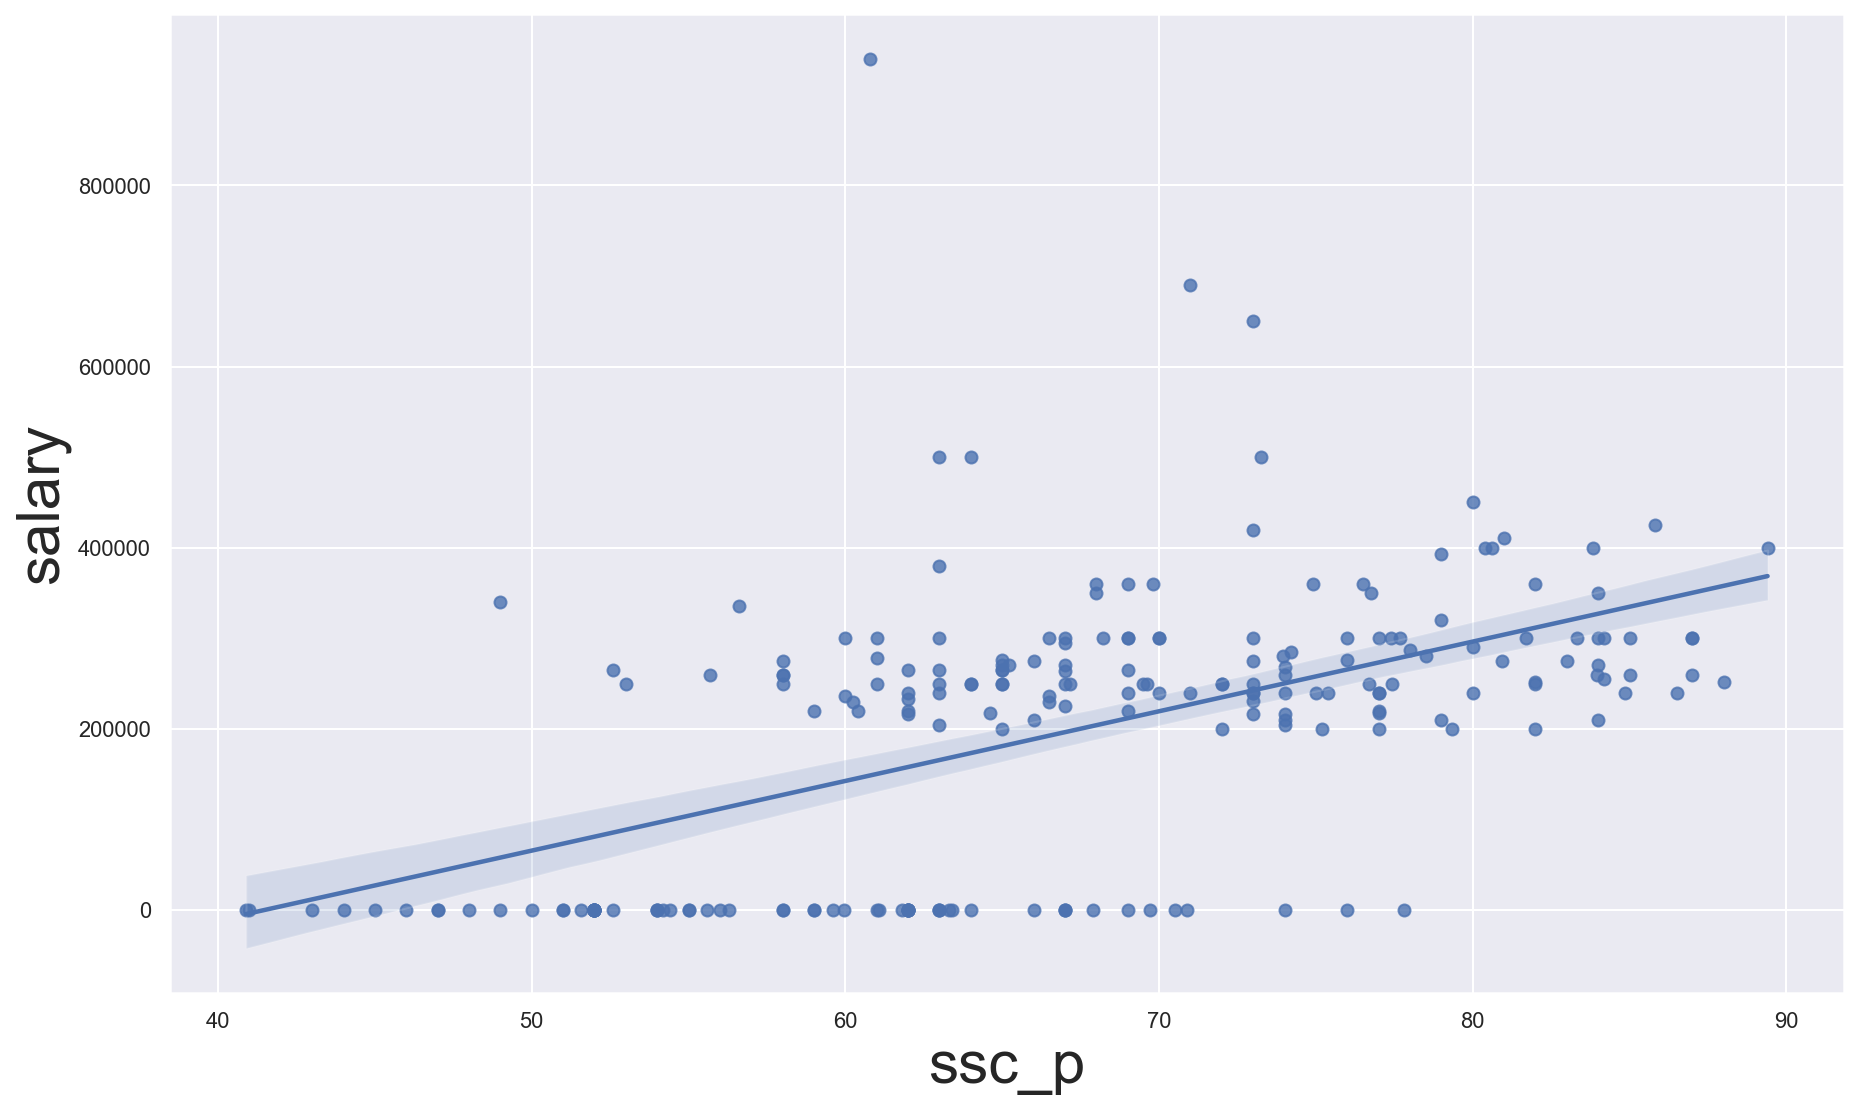

In [51]:
import seaborn as sns
sns.set(color_codes=True)
ax = sns.regplot(x=x2['ssc_p'], y=data2['salary'])
plt.ylabel("salary",fontsize=30)
plt.xlabel("ssc_p",fontsize=30)

Text(0.5, 0, 'hsc_p')

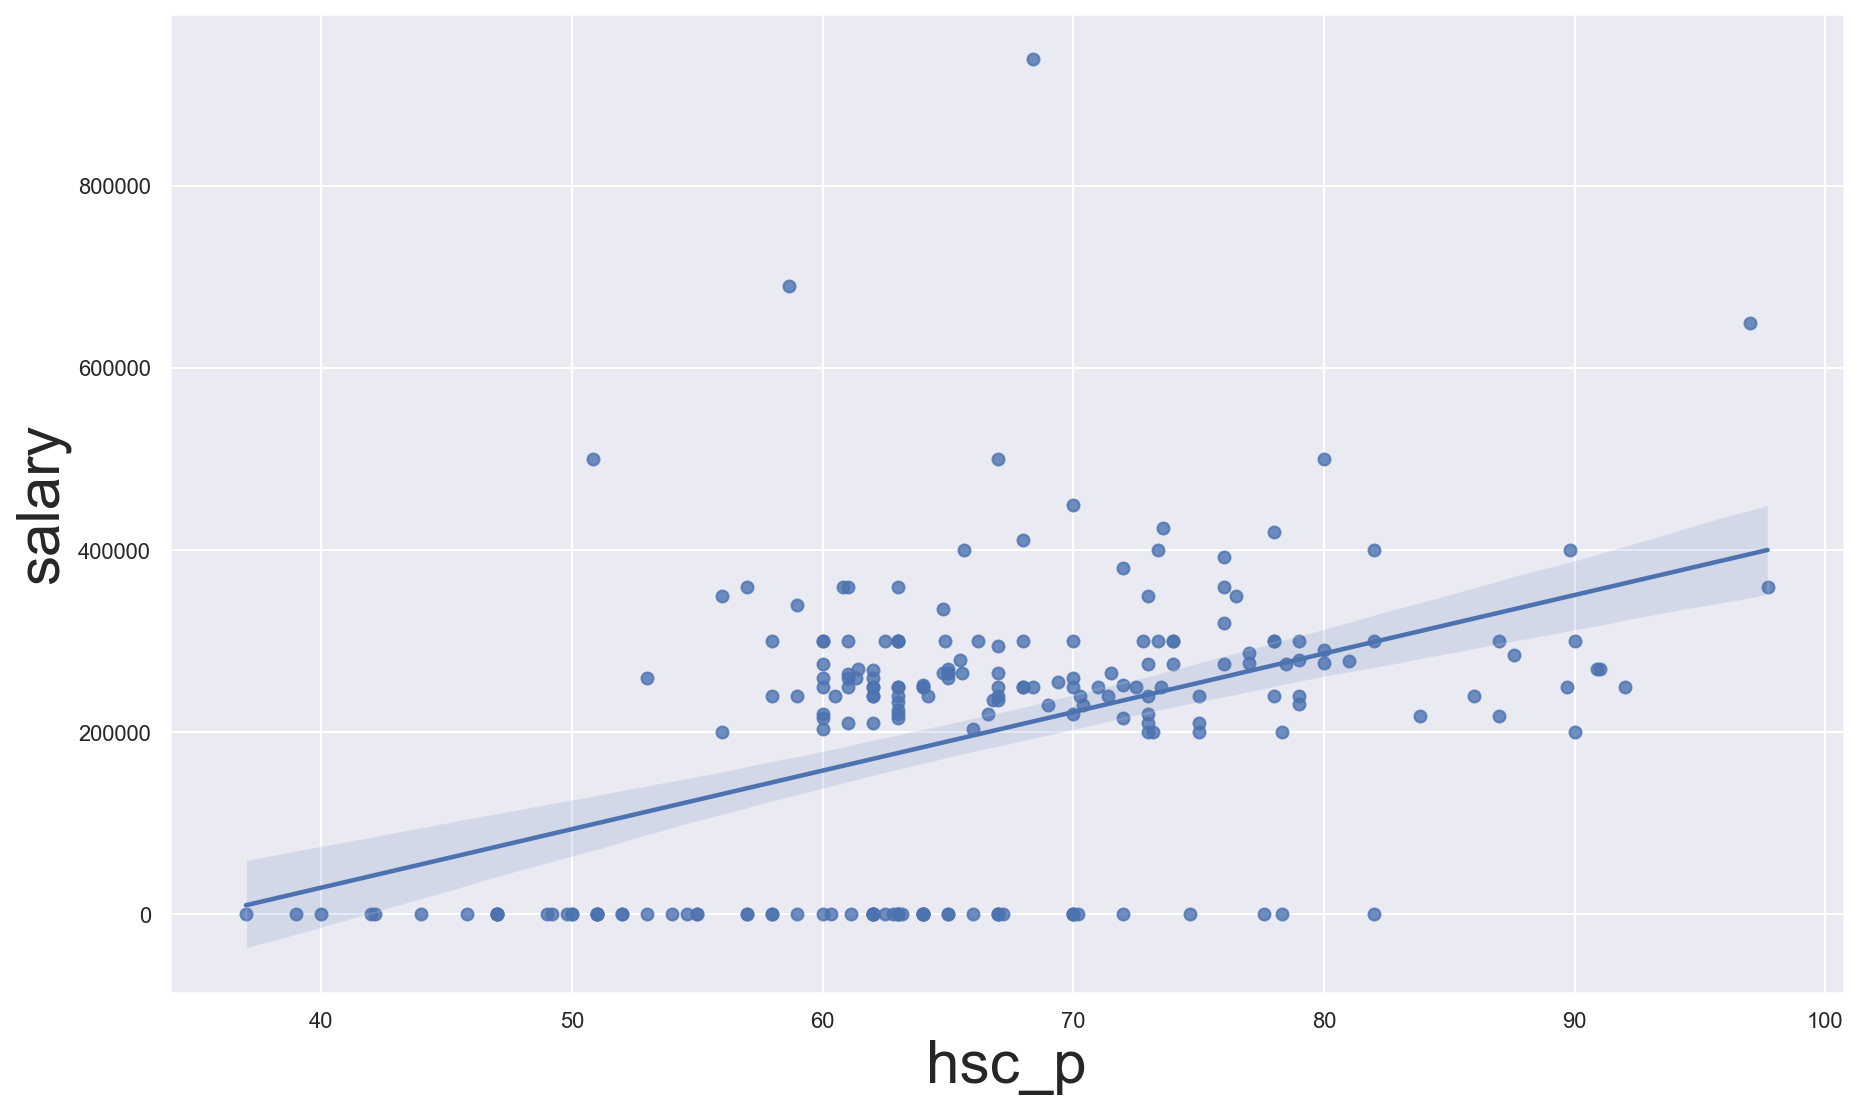

In [52]:
ax = sns.regplot(x=x2['hsc_p'], y=data2['salary'])
plt.ylabel("salary",fontsize=30)
plt.xlabel("hsc_p",fontsize=30)

Text(0.5, 0, 'degree_p')

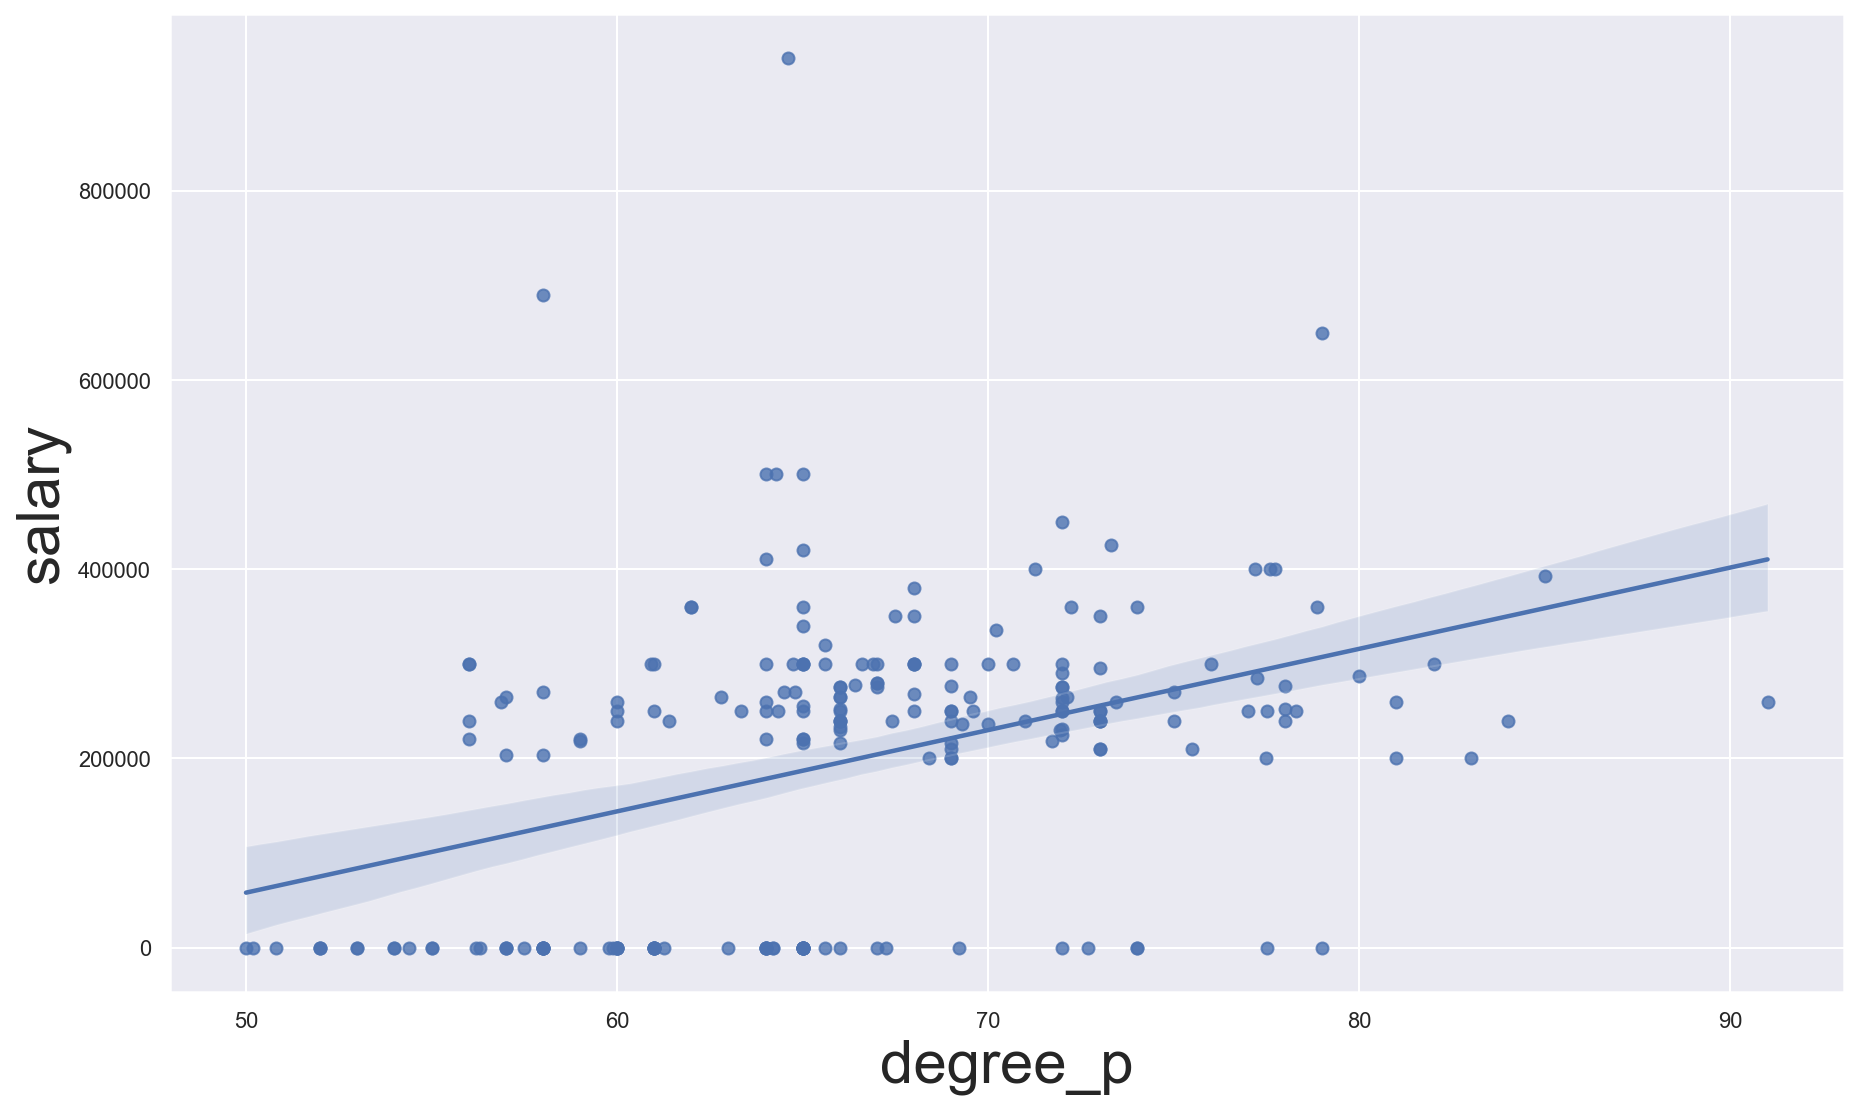

In [53]:
ax = sns.regplot(x=x2['degree_p'], y=data2['salary'])
plt.ylabel("salary",fontsize=30)
plt.xlabel("degree_p",fontsize=30)

## E. Expectation of Residuals is Zero

In [54]:
fitted.resid.mean()

-4.8055161916932396e-11

## F. Values of Residuals are Uncorrelated

In [55]:
model = sm.OLS(y, x_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Residuals   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.699
Date:                Thu, 09 Jul 2020   Prob (F-statistic):             0.0152
Time:                        16:46:43   Log-Likelihood:                -2814.5
No. Observations:                 215   AIC:                             5643.
Df Residuals:                     208   BIC:                             5667.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.561e+04   3.07e+04     -0.835      0.405   -8.61e+04    3.49e+04
ssc_p        1.635e+04   4.73e+04      0.345      0.730    -7.7e+04     1.1e+05
hsc_p        1.124e+04    5.5e+04      0.204      0.838   -9.73e+04     1.2e+05
degree_p     5.384e+04   5.69e+04      0.946      0.345   -5.83e+04    1.66e+05
mba_p       -9.714e+04   4.44e+04     -2.187      0.030   -1.85e+05   -9588.688
Male?        4.702e+04   1.82e+04      2.584      0.010    1.12e+04    8.29e+04
Experience?  -932.1220   1.77e+04     -0.053      0.958   -3.58e+04    3.39e+04
==============================================================================
Omnibus:                       89.862   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.261
Skew:                           1.533   Prob(JB):                    3.48e-107
Kurtosis:                       9.732   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## G. Influential Data Points

In [56]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\Richa\anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


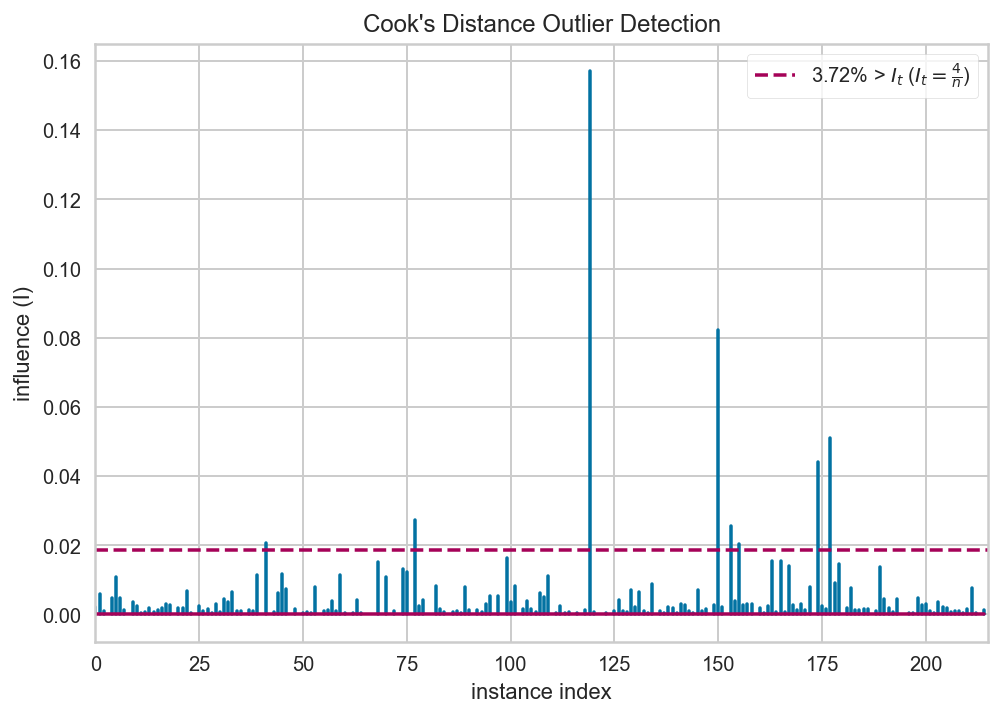

In [58]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(x2, y2)
visualizer.show()